# 1. Processing the initial CSV to extract useful features

## 1.1 CSVDataProcessor

CSVDataProcessor is a utility class designed to process training and testing CSV files containing user session data. It extracts meaningful features from each session by tracking all unique actions, screens, configurations, and chains, and counting their occurrences. Additionally, it computes:
- The total number of actions in each session
- The session duration
- The user’s average speed during the session

The processed data is returned as a pandas DataFrame




In [1]:
from utils import CSVDataProcessor
import pandas as pd
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
with CSVDataProcessor("train.csv") as processor:
    train_dataframe = processor.get_processed_train_data()
    test_dataframe = processor.get_processed_test_data(test_data_csv_path="test.csv")

In [3]:
train_dataframe.head(5)

,user,navigator,total_actions,session_duration,avg_speed,uses_french,occurrence of action 'Double-clic',occurrence of action 'Sélection d'un flag',occurrence of action 'Lancement d'une action infocentre',occurrence of action 'Affichage d'un toast',...,occurrence of chaine 'vtprev',occurrence of chaine 'mobitour',occurrence of chaine 'valwf',occurrence of chaine 'usl',occurrence of chaine 'fr.infologic.stocks.',occurrence of chaine 'fr.infologic.achats.',occurrence of chaine 'gmao',occurrence of chaine 'tournee',occurrence of chaine 'info',occurrence of chaine 'ndf'
0,nuh,Firefox,2514,2905,0.865404,0,87,0,0,311,...,0,0,0,0,0,0,0,0,0,0
1,muz,Google Chrome,90,230,0.391304,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,zrx,Microsoft Edge,608,750,0.810667,0,21,0,0,6,...,0,0,0,0,0,0,0,0,0,0
3,pou,Firefox,886,1445,0.613149,0,1,60,0,2,...,0,0,0,0,0,0,0,0,0,0
4,ald,Google Chrome,173,275,0.629091,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_dataframe.head(5)

,navigator,total_actions,session_duration,avg_speed,uses_french,occurrence of action 'Double-clic',occurrence of action 'Sélection d'un flag',occurrence of action 'Lancement d'une action infocentre',occurrence of action 'Affichage d'un toast',occurrence of action 'Affichage d'une dialogue',...,occurrence of chaine 'vtprev',occurrence of chaine 'mobitour',occurrence of chaine 'valwf',occurrence of chaine 'usl',occurrence of chaine 'fr.infologic.stocks.',occurrence of chaine 'fr.infologic.achats.',occurrence of chaine 'gmao',occurrence of chaine 'tournee',occurrence of chaine 'info',occurrence of chaine 'ndf'
0,Microsoft Edge,300,540,0.555556,1,37,0,0,0,48,...,0,0,0,0,0,0,0,0,0,0
1,Firefox,580,800,0.725000,0,32,86,0,0,52,...,0,0,0,0,0,0,0,0,0,0
2,Google Chrome,714,1225,0.582857,0,2,0,0,0,13,...,0,0,0,0,0,0,0,0,0,0
3,Google Chrome,1062,1225,0.866939,0,61,170,0,0,90,...,0,0,0,0,0,0,0,0,0,0
4,Firefox,211,280,0.753571,0,0,0,0,0,16,...,0,0,0,0,0,0,0,0,0,0


# 2. EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Statistiques descriptives ===
print("Statistiques descriptives :")
train_dataframe.describe(include='all')

Statistiques descriptives :


,user,navigator,total_actions,session_duration,avg_speed,uses_french,occurrence of action 'Double-clic',occurrence of action 'Sélection d'un flag',occurrence of action 'Lancement d'une action infocentre',occurrence of action 'Affichage d'un toast',...,occurrence of chaine 'vtprev',occurrence of chaine 'mobitour',occurrence of chaine 'valwf',occurrence of chaine 'usl',occurrence of chaine 'fr.infologic.stocks.',occurrence of chaine 'fr.infologic.achats.',occurrence of chaine 'gmao',occurrence of chaine 'tournee',occurrence of chaine 'info',occurrence of chaine 'ndf'
count,3279,3279,3279.000000,3279,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
unique,247,4,NaN,576,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,skm,Firefox,NaN,95,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,75,1466,NaN,41,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,692.359561,NaN,0.938074,0.038426,17.769442,9.821897,0.090881,14.858798,...,0.362001,0.096371,0.238182,0.285758,0.017688,0.010369,0.132357,0.014334,1.511131,0.140897
std,NaN,NaN,1005.873878,NaN,0.388362,0.192253,59.328538,47.728692,1.424414,46.711953,...,6.947316,3.295195,3.373667,4.425757,0.550382,0.463969,2.499942,0.492261,18.375460,2.641765
min,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,153.000000,NaN,0.733333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,340.000000,NaN,0.880833,0.000000,3.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,818.500000,NaN,1.066158,0.000000,11.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


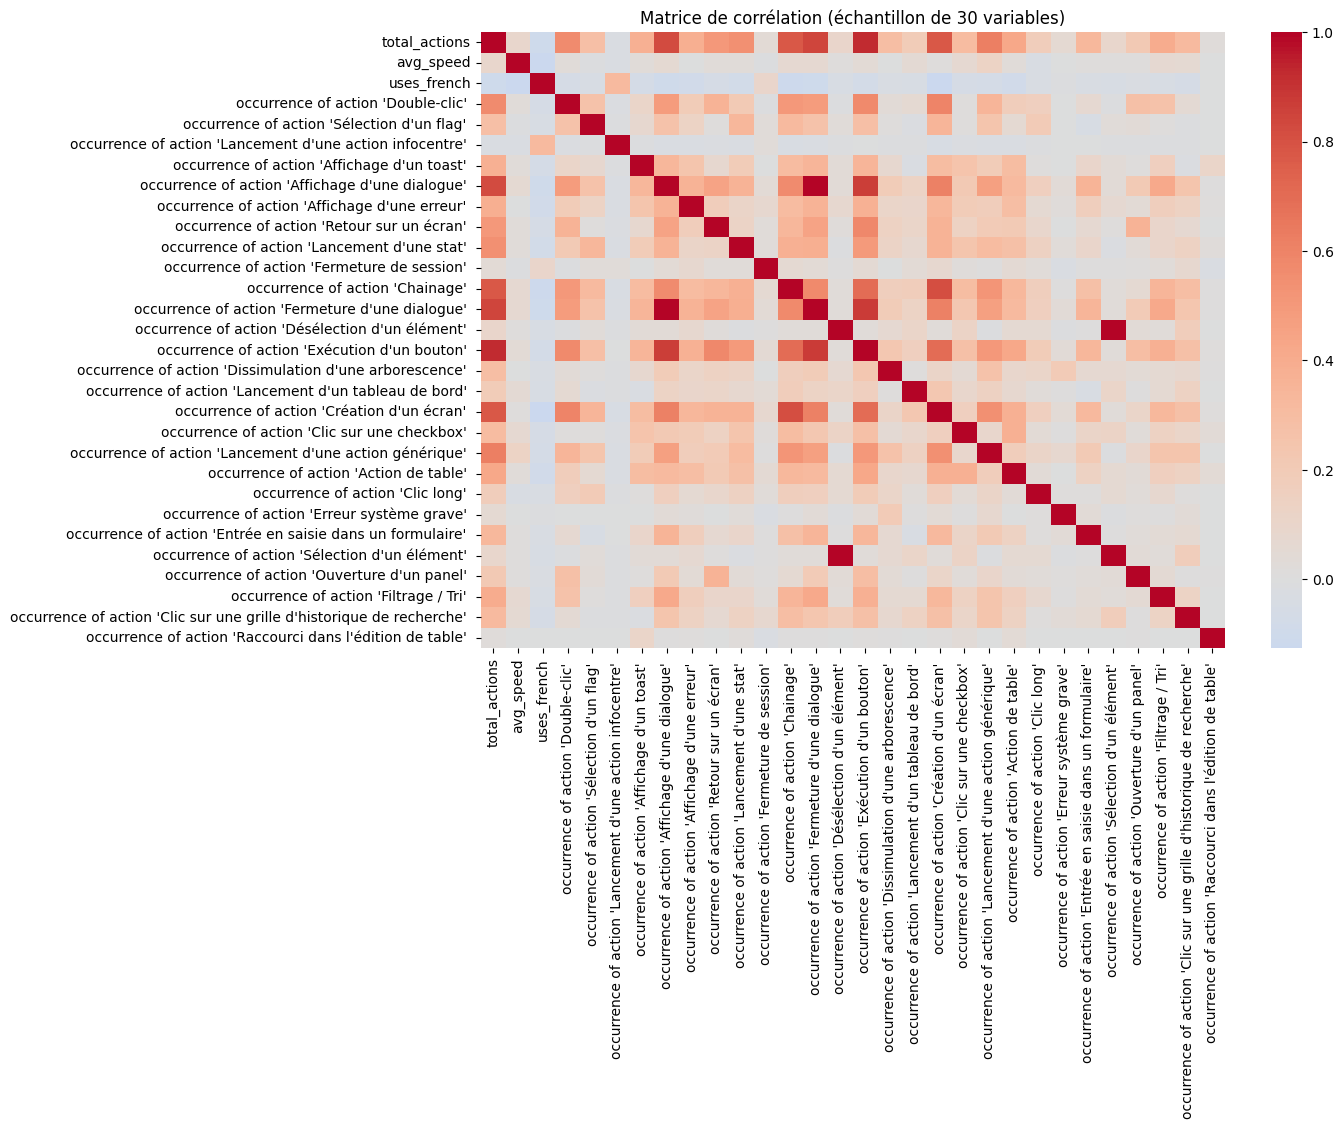

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = train_dataframe.select_dtypes(include='number').columns

# On prend un échantillon de 30 colonnes aléatoires
sample_cols = numeric_cols[:30]  # ou random.sample(list(numeric_cols), 30)

corr_sample = train_dataframe[sample_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_sample, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation (échantillon de 30 variables)")
plt.show()


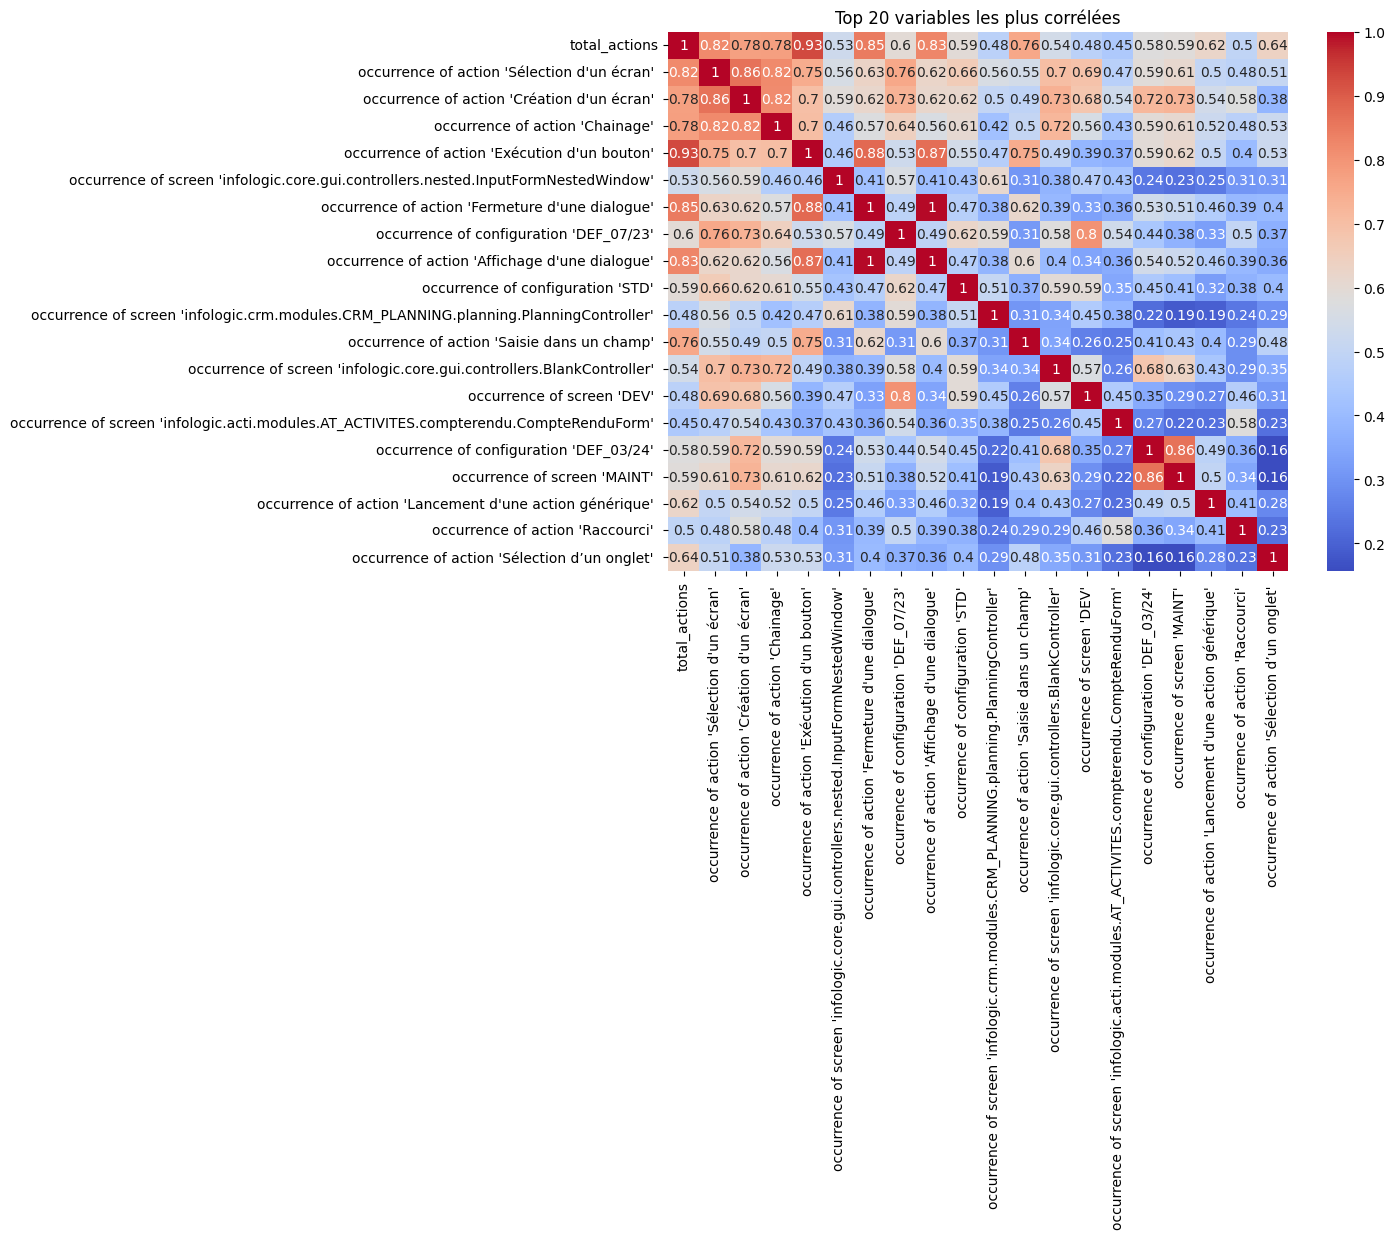

In [7]:
corr_matrix = train_dataframe.corr(numeric_only=True)
mean_corr = corr_matrix.abs().mean().sort_values(ascending=False)

top_features = mean_corr.head(20).index  # top 20 les plus corrélées
plt.figure(figsize=(10, 7))
sns.heatmap(train_dataframe[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Top 20 variables les plus corrélées")
plt.show()


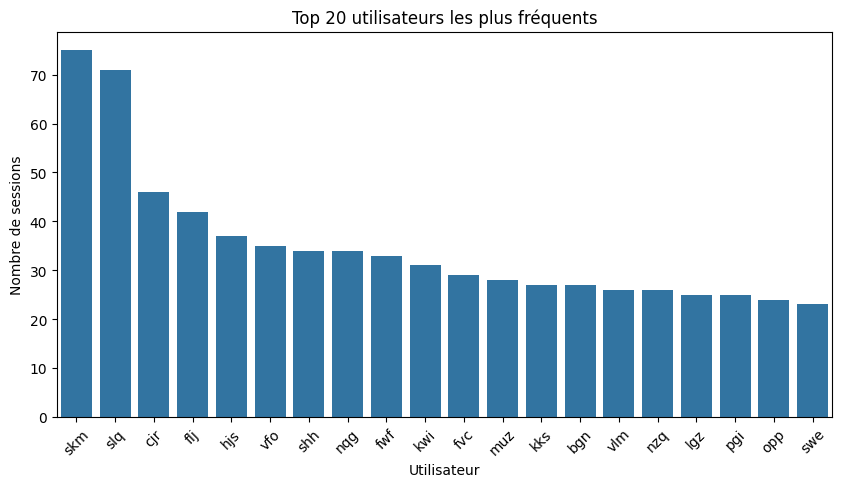

In [8]:

top_users = train_dataframe['user'].value_counts().head(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_users.index, y=top_users.values)
plt.title("Top 20 utilisateurs les plus fréquents")
plt.xticks(rotation=45)
plt.xlabel("Utilisateur")
plt.ylabel("Nombre de sessions")
plt.show()


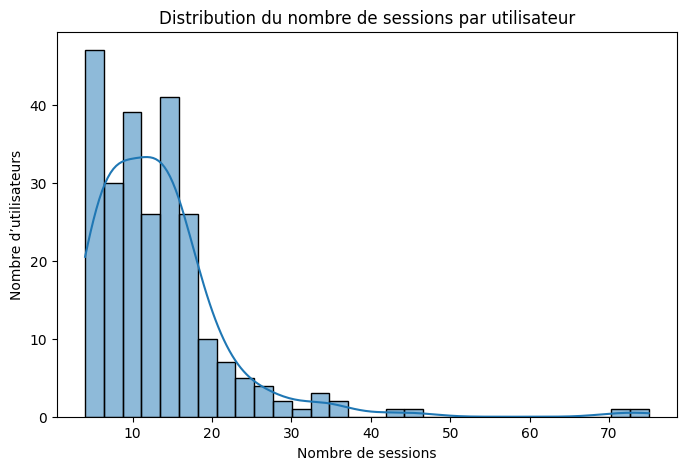

In [9]:
user_counts = train_dataframe['user'].value_counts()

plt.figure(figsize=(8, 5))
sns.histplot(user_counts, bins=30, kde=True)
plt.title("Distribution du nombre de sessions par utilisateur")
plt.xlabel("Nombre de sessions")
plt.ylabel("Nombre d’utilisateurs")
plt.show()


# 3. Dataset Preparation helper funtions

This section defines a set of **functions** that perform the essential steps
to transform data into a model-ready format.  

These operations include:
- **1. One-hot encoding** — converting categorical feature columns into binary indicators
- **2. Feature and target split** — splitting the dataset into inputs (`X`) and target (`y`)
- **3. Label encoding** — converting categorical target labels into numeric values
- **4. Feature scaling** — standardizing numerical values for better model performance

All these helper functions will be combined into a single entry point, **`prepareDataset()`**,  
which coordinates the entire preparation process and returns clean, ready-to-train data.


## 3.1. One hot Incoding

In [10]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(data_frame: pd.DataFrame,column: str) -> pd.DataFrame:
    encoder = OneHotEncoder(sparse_output=False)
    encoded = encoder.fit_transform(data_frame[[column]])
    df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([column]))
    # Merge encoded columns with the original DataFrame
    df_encoded = pd.concat([data_frame.drop(column, axis=1), df_encoded], axis=1)
    return df_encoded

## 3.2. feature target split

In [11]:
def feature_target_split(data_frame: pd.DataFrame,target_column: str):
    X_df = data_frame.drop(columns=[target_column])
    X = X_df.values 
    y_str = data_frame[target_column].values

    return X, y_str

## 3.3. Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def encode_labels(y_str):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y_str)

    return y

## 3.4. Standard Scaler

In [13]:
from sklearn.preprocessing import StandardScaler

def scale_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled
    

## 3.5. Entry Point Functions (Prepare Dataset/ prepare_test_dataset)
We will use the helper functions to prepare the training data by:

- **1. Converting categorical feature `navigator` into binary indicators**
- **2. Splitting the dataset into inputs (`X`) and target (`y`)**
- **3. Standardizing numerical values**
- **4. In the case of train data, converting categorical target labels `user` into numeric values**

In [14]:
def prepare_dataset(data_frame: pd.DataFrame):
    encoded_data_frame = one_hot_encode(data_frame, "navigator")
    X, y_str = feature_target_split(encoded_data_frame, "user")
    encoded_y = encode_labels(y_str)
    scaled_X = scale_features(X)

    return scaled_X, encoded_y

def prepare_test_dataset(data_frame: pd.DataFrame):
    encoded_data_frame = one_hot_encode(data_frame, "navigator")
    scaled_X = scale_features(encoded_data_frame)

    return scaled_X
    

# 4. Prepare train Data

## 4.1. Prepare Dataset
Transform data into a model-ready format

In [15]:
scaled_X, encoded_y = prepare_dataset(train_dataframe)

## 4.2. Train Test Split
Split the features and labels into training (80%) and testing sets (20%) for model evaluation    
    

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, encoded_y, 
    test_size=0.2, 
    random_state=42
)

# 5.Comparing and Selecting the Best Classifier

## 5.1. Model Comparison

We train and evaluate multiple classifiers:
- **1. Random Forest**
- **2. Decision Tree**
- **3. Logistic Regression**
- **4. Naive Bayes**
- **5. KNN**
- **6. MLP**
- **7. Xgboost**
  
The **weighted F1-score** is used to rank the models from best to worst.


In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
# Dictionnaire des modèles à tester
models = {
    "RandomForest": RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "NaiveBayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(
    n_estimators=100,        # nombre d’arbres
    learning_rate=0.1,       # taux d’apprentissage
    max_depth=4,             # profondeur max de chaque arbre
    random_state=42
),
    "KNN": KNeighborsClassifier(),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(128, 128), activation='relu', solver='adam', max_iter=300, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append({"Model": name, "F1 Score": f1})

# Classement des modèles
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

results_df


,Model,F1 Score
0,RandomForest,0.822040
1,XGBoost,0.780190
2,DecisionTree,0.656606
3,NeuralNetwork,0.618280
4,LogisticRegression,0.617915
5,NaiveBayes,0.517644
6,KNN,0.385603


## 5.2. Results visualization

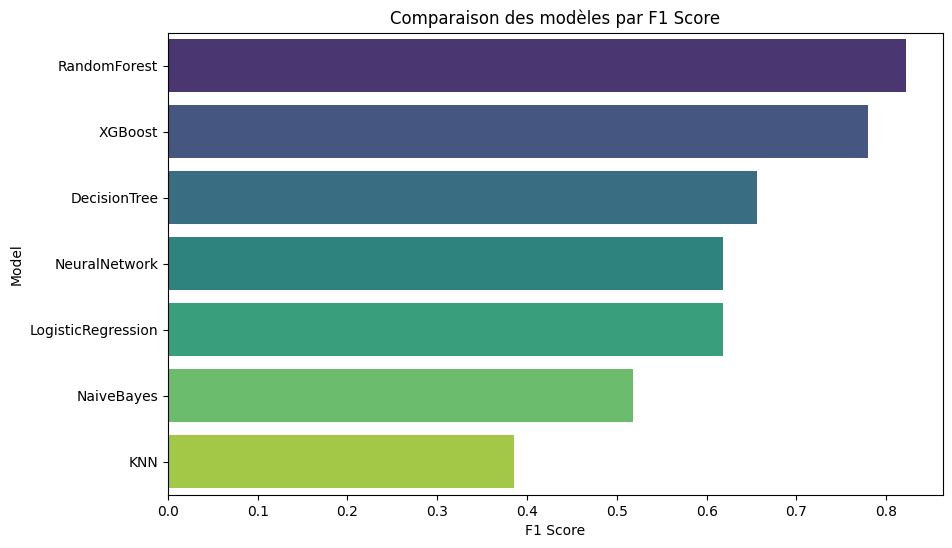

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x="F1 Score", y="Model", data=results_df, palette="viridis")
plt.title("Comparaison des modèles par F1 Score")
plt.show()


## 5.3. Feature importance


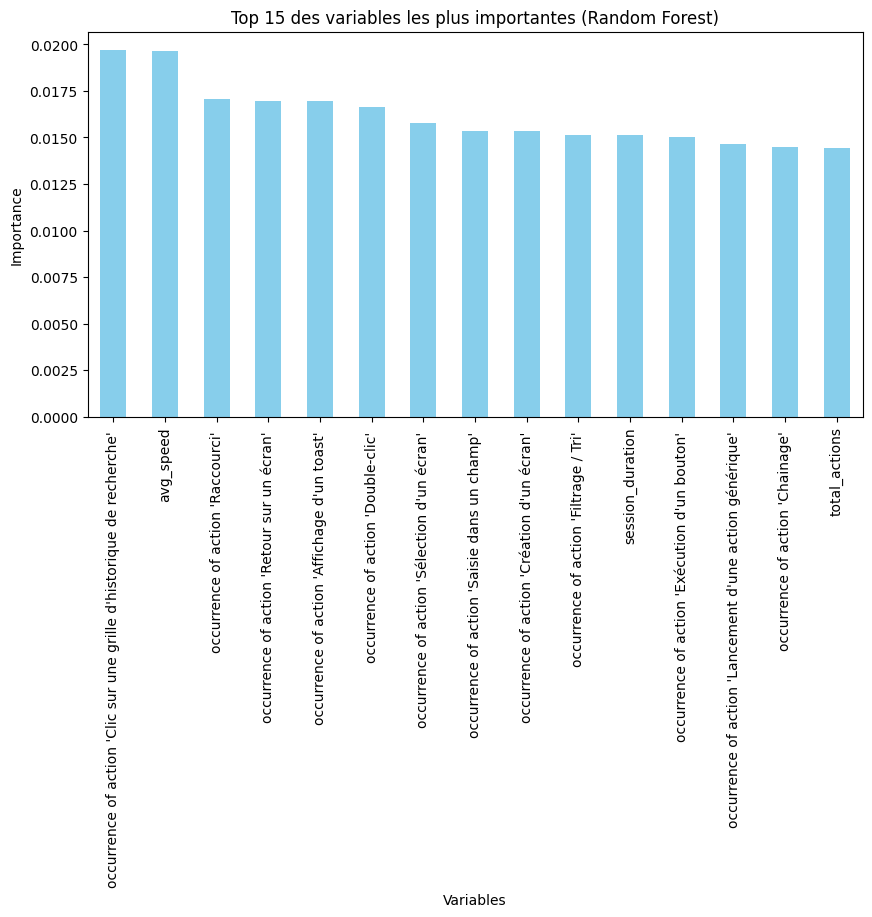

In [19]:
encoded_data_frame = one_hot_encode(train_dataframe, "navigator")
X_df = encoded_data_frame.drop(columns=["user"])
y_str = encoded_data_frame["user"].values
# Entraînement du modèle RandomForest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
# Importance des variables
importances = pd.Series(rf.feature_importances_, index=X_df.columns)

# On sélectionne les 15 plus importantes
top_features = importances.sort_values(ascending=False).head(15)

# Affichage graphique
plt.figure(figsize=(10, 5))
top_features.plot(kind="bar", color='skyblue')
plt.title("Top 15 des variables les plus importantes (Random Forest)")
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


## 5.4 Conclusion
The **Random Forest** classifier achieved the highest `F1-score` among all tested models.  

# 6. Hyperparameter Tuning

To further improve the performance of our classifier, we will now focus on tuning its hyperparameters.
This step aims to increase the F1-score and optimize the model for better predictive accuracy.

For this purpose, we use **GridSearchCV** from **scikit-learn** to systematically explore a predefined set of hyperparameter combinations for the Random Forest classifier.
This method evaluates each combination using **5-fold cross-validation**, providing a reliable estimate of model performance while helping to prevent overfitting.


## 6.1 Hyperparameters Tested

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
rf = RandomForestClassifier(random_state=42)  

param_grid = {       
    "n_estimators": [200, 300, 400],         
    "max_depth": [None, 10, 20, 30],         
    "min_samples_split": [2, 5, 10],        
    "min_samples_leaf": [1, 2, 4],           
    "max_features": ["auto", "sqrt", "log2"] 
}


In [22]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # utiliser tous les coeurs du CPU
    verbose=0,
    scoring='f1_weighted'
)


In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 400]},
             scoring='f1_weighted')

## 6.2 Evaluation on the Test Set

In [24]:
from sklearn.metrics import accuracy_score, classification_report

### 6.2.1 Best Hyperparameters 

In [25]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

### 6.2.2 Best score

In [26]:
grid_search.best_score_

0.836544804762515

In [28]:
best_rf = grid_search.best_estimator_

# 7. Generating Predictions using the test data

## 7.1. Prepare test data

In [29]:
X_test_scaled = prepare_test_dataset(test_dataframe)

## 7.2 Generate predictions

In [30]:
# best_model_name = results_df.iloc[0]["Model"]
# best_model = models[best_model_name]

#  Prédiction
y_pred_encoded = best_rf.predict(X_test_scaled)

#  Décodage inverse vers les noms d’utilisateurs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_dataframe["user"])  # important : fit sur le train

y_pred = le.inverse_transform(y_pred_encoded)

## 7.3 Export results to csv

In [31]:
import pandas as pd

predictions_df = pd.DataFrame({
    'RowId': range(1, len(y_pred) + 1),
    'prediction': y_pred
})

predictions_df.to_csv('submission_kaggle.csv', index=False)
print("Fichier 'submission_kaggle.csv' créé avec succès ✅")

Fichier 'submission_kaggle.csv' créé avec succès ✅
